### Pytorch Computer Vision


#### Computer vision libraries in PyTorch

* `torchvision` - base domain for all computer vision problems
* `torchvision.datasets` - get data sets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for a ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [41]:
# Import torch PyTorch
import torch 
from torch import nn

# Import torchvision
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

#Check versions
print(torch.__version__)
print(torchvision.__version__)



2.1.2
0.16.2


### Get a dataset

The data which will be used is FashionMNIST

In [42]:
# Set Up Training Data 

train_data = datasets.FashionMNIST(
    root='data', # Where to save the data
    train=True,  # Use training set
    download=True, # Do you want to download it?
    transform= ToTensor(), # Transform to tensor
    target_transform=None # No target transform (labels)
)

test_data = datasets.FashionMNIST(
    root='data', # Where to save the data
    train=False,  # Use training set
    download=True, # Do you want to download it?
    transform= ToTensor(), # Transform to tensor
    target_transform=None # No target transform (labels)
)

In [43]:
len(train_data), len(test_data)

(60000, 10000)

In [44]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [45]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
print(f"Image shape: {image.shape}, Label: {label}")

Image shape: torch.Size([1, 28, 28]), Label: 9


### Visualize the data

Text(0.5, 1.0, 'Label: Bag')

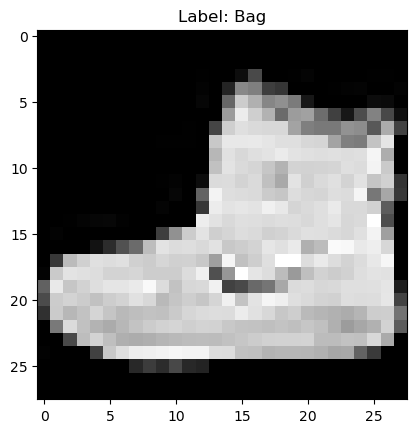

In [60]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Label: ' + class_names[label])


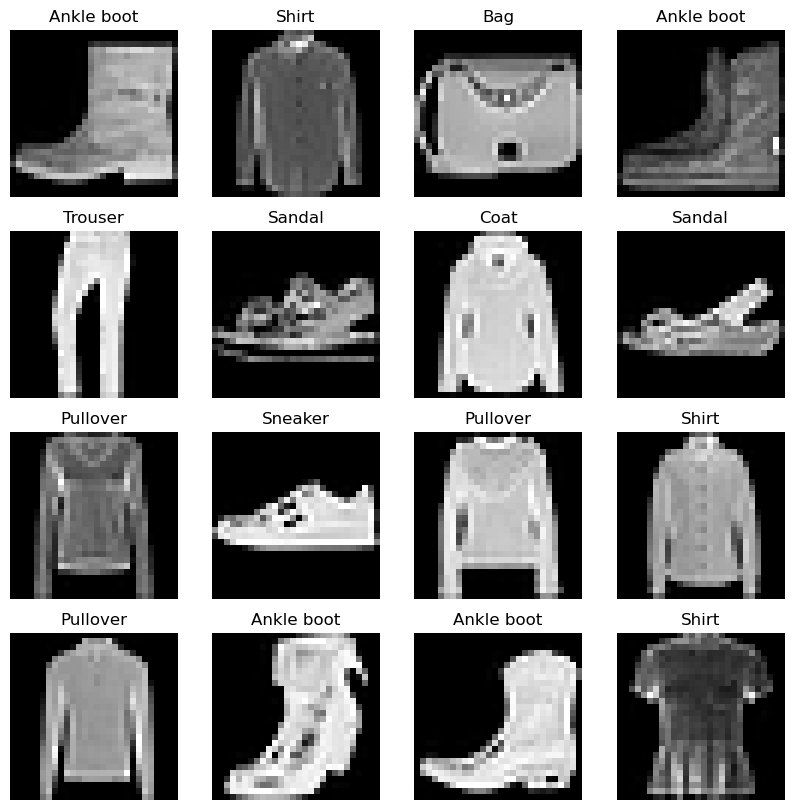

In [61]:
# Look at random images from the dataset

import random
import matplotlib.pyplot as plt
torch.manual_seed(42)
fig = plt.figure(figsize=(10, 10))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(class_names[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')

## Prepare the DataLoader

Right now, the data is in the form of PyTorch Datasets.

DataLoader turn our data into a Python iterable

More specifically, we want to turn our data into mini-batches which allows for computational efficiency, and allows the neural network more chances to update the gradient



In [62]:
from torch.utils.data import DataLoader

# Set up BATCH_SIZE hyperparameter

BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data, 
    batch_size=BATCH_SIZE, 
    shuffle=True
    )


test_dataloader = DataLoader(
    test_data, 
    batch_size=BATCH_SIZE, 
    shuffle=False
    )



In [63]:
# Visualize the dataloaders

print(f" DataLoaders: {train_dataloader, test_dataloader}")
print(f" Length of train dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f" Length of test dataloader: {len(test_dataloader)} batches of size {BATCH_SIZE}")

 DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000021C1B153C50>, <torch.utils.data.dataloader.DataLoader object at 0x0000021C1B0DDED0>)
 Length of train dataloader: 1875 batches of size 32
 Length of test dataloader: 313 batches of size 32


In [64]:
# Visualize the train dataloaders

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 8
Label Size: torch.Size([])


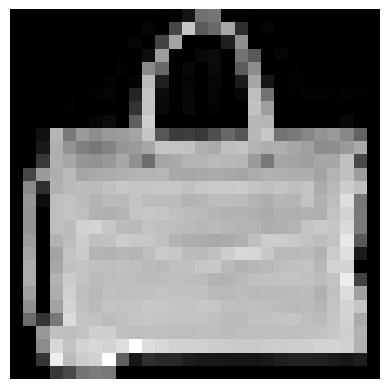

In [65]:
# Show a sample image from the batch

import matplotlib.pyplot as plt

#torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')

plt.axis('off')

print(f"Image Size: {img.shape}")
print(f"Label: {label}")
print(f"Label Size: {label.shape}")

### Build the baseline model

When starting to build a series of ML model experiments, it's best practice to start with a baseline model

Then try to improve upon and add complexity when needed. 

Start simple, add complexity when needed

In [66]:
# Create a flatten layer

class FashionMNISTModelV0(nn.Module):
    
    def __init__(self,
            input_size: int,
            hidden_neurons: int,
            output_shape: int
            ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_neurons),
            nn.ReLU(),
            nn.Linear(hidden_neurons, output_shape))
    
    
    def forward(self, x):
        return self.layer_stack(x)

In [67]:
torch.manual_seed(42)

# Instantiate the model with hyperparameters
model_0 = FashionMNISTModelV0(784,64,len(class_names)).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [68]:

dummy_x = torch.rand([1,1,28,28])

model_0(dummy_x)

tensor([[ 0.0625,  0.2006, -0.0586, -0.0426, -0.1707, -0.0049,  0.3559, -0.0301,
         -0.2055,  0.0495]], grad_fn=<AddmmBackward0>)

In [70]:
# Set up loss function, Optimizer and evaluation metrics
from torch.nn import functional as F
import torchmetrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)



#train_acc_metric = torchmetrics.Accuracy(num_classes=10, task='multiclass')
#train_F1_metric = torchmetrics.F1Score(num_classes=10, task='multiclass')
#test_acc_metric = torchmetrics.Accuracy(num_classes=10, task='multiclass')
#test_F1_metric = torchmetrics.F1Score(num_classes=10, task='multiclass')


In [71]:
# Create a function to time our experiments
# Often want to track performance and how fast it runs
from timeit import default_timer as timer

def training_time(start: float,
                    end: float,
                    device: torch.device):

    """Calculate training time using start and end times"""
    
    total_time = end - start
    print(f"Training time on {device}: {total_time:.3f}s")
    return total_time

### Create a training and testing loop with batch training

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss **per batch**
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch* 
4. Print out metrics
5. Time it!


In [72]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer() 

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()
        
        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode(): 
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

            # Calculate the test loss average per batch
            test_loss /= len(test_dataloader)

            # Calculate the test acc average per batch
            test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = training_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5717 | Test loss: 0.0007, Test acc: 0.3003
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4139 | Test loss: 0.0006, Test acc: 0.3202
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.3761 | Test loss: 0.0007, Test acc: 0.2803
Training time on cpu: 25.936s
